<a href="https://colab.research.google.com/github/vanshd15/CodSoft-DS/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#read the dataset into a dataframe
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')

In [ ]:
#show first five records of dataframe
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
#show the number of records and observations in the dataframe
df.shape

(15509, 10)

In [ ]:
#check out the information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
#check out the missing values in each observation
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
#drop records with missing value in any of the following columns: Name, Year, Duration, Votes, Rating
df.dropna(subset=['Name', 'Year', 'Duration', 'Votes', 'Rating'], inplace=True)

In [ ]:
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,31
Rating,0
Votes,0
Director,1
Actor 1,75
Actor 2,117
Actor 3,163


In [ ]:
#remove rows with duplicate movie records
df.drop_duplicates(subset=['Name', 'Year', 'Director'], keep='first', inplace=True)

In [ ]:
#remove () from the Year column values and change the datatype to integer
df['Year'] = df['Year'].str.strip('()').astype(int)

In [ ]:
#remove minutes from the Duration column values
df['Duration'] = df['Duration'].str.replace(r' min', '').astype(int)

In [ ]:
#remove commas from Votes column and convert to integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [ ]:
df.shape

(5850, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   int64  
 2   Duration  5850 non-null   int64  
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   int64  
 6   Director  5849 non-null   object 
 7   Actor 1   5775 non-null   object 
 8   Actor 2   5733 non-null   object 
 9   Actor 3   5687 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 502.7+ KB


In [ ]:
df.describe()

,Year,Duration,Rating,Votes
count,5850.000000,5850.000000,5850.000000,5850.000000
mean,1996.426496,132.293675,5.931504,2611.717949
std,19.902673,26.558025,1.389772,13434.933770
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.750000
max,2021.000000,321.000000,10.000000,591417.000000


Exploratory Data Analysis (EDA)

i. Number of Movies each Year

In [ ]:
#group the data by Year and count the number of movies in each year
yearly_movie_counts = df['Year'].value_counts().sort_index()

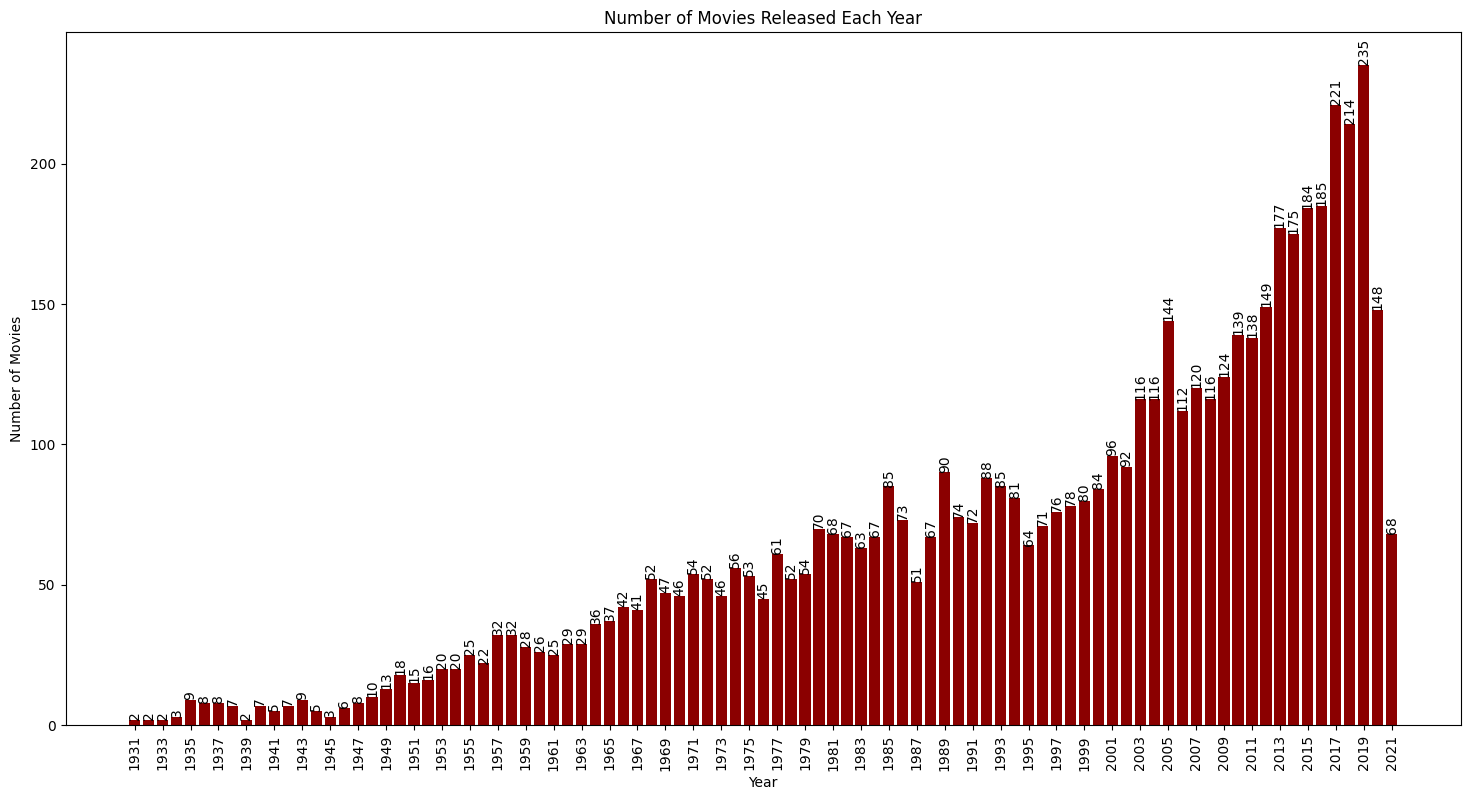

In [ ]:
# create a bar chart and store the bars in a variable
plt.figure(figsize=(18, 9))
bars = plt.bar(yearly_movie_counts.index, yearly_movie_counts.values, color='darkred') # assign the output of plt.bar to bars
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')

# Show every second year on the x-axis and rotate x-labels for better readability
plt.xticks(yearly_movie_counts.index[::2], rotation=90)
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom', rotation= 90)
plt.show()

ii. Creating Genre Dummy Columns and Analyzing Movie Counts by Genre

In [ ]:
#create dummy columns for each genre
dummies = df['Genre'].str.get_dummies(', ')

In [ ]:
#creating a new dataframe which combines df and dummies
df_genre = pd.concat([df, dummies], axis=1)

In [ ]:
genre_columns = df_genre.columns[10:]  # Assuming genre columns start from the 11th columngenre_columns

In [ ]:
#group the data by genre_columns and count the number of movies in each genre
genre_movie_counts = df_genre[genre_columns].sum().sort_index()

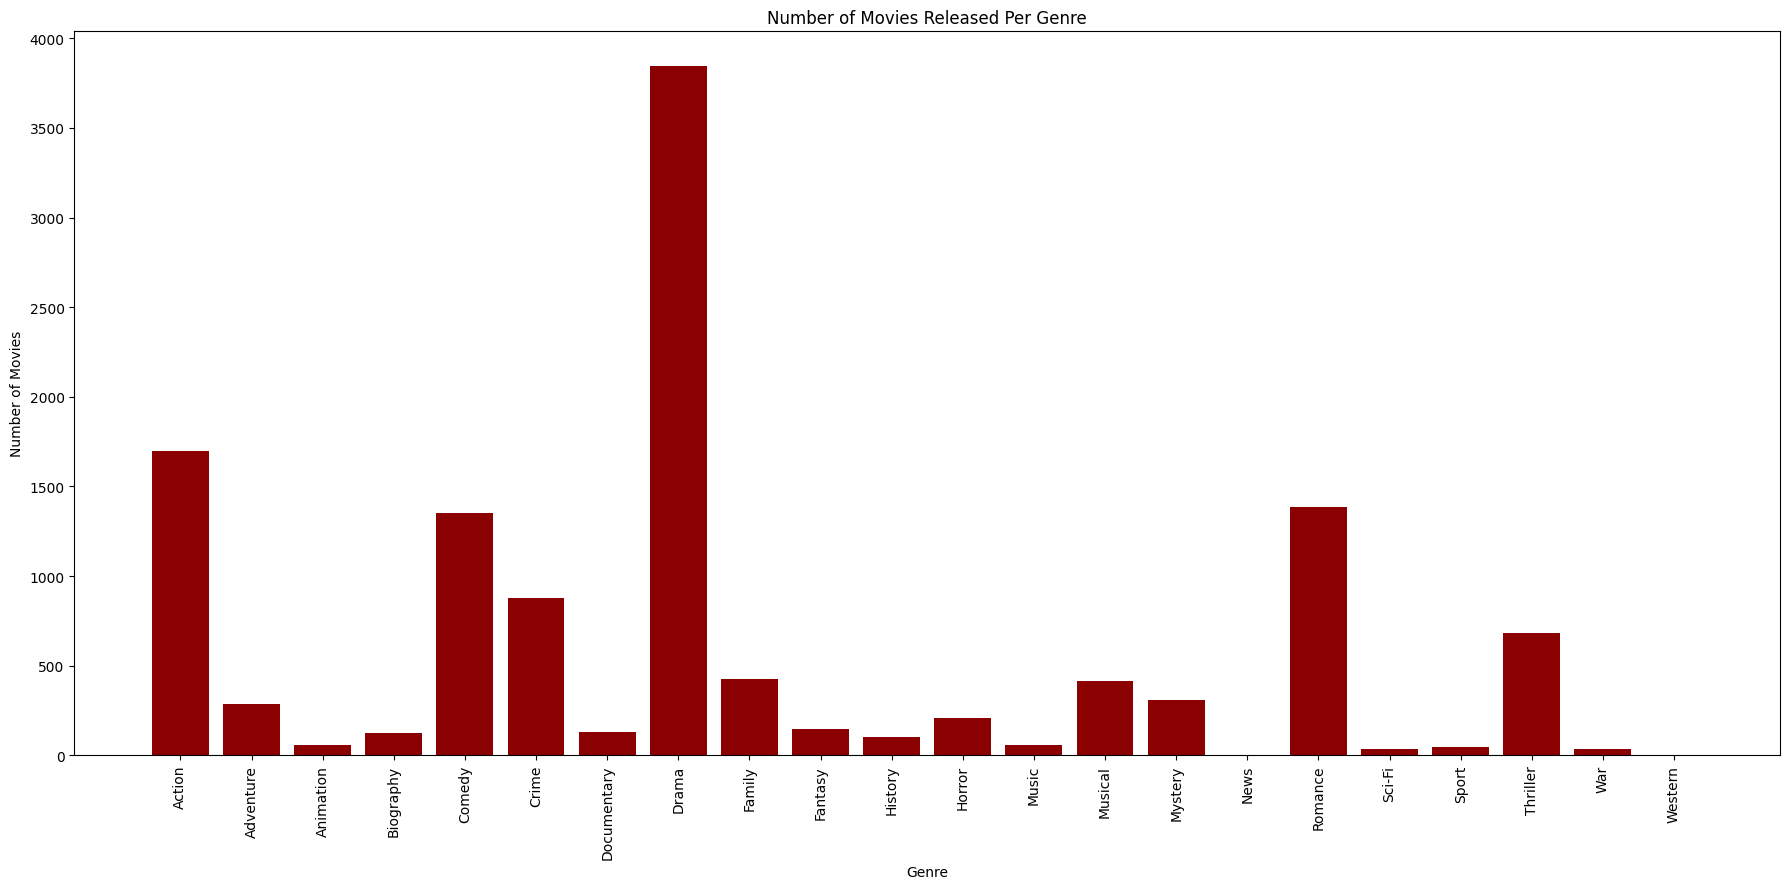

In [ ]:
# create a bar chart
plt.figure(figsize=(18, 9))
plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='darkred')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')
plt.xticks(rotation=90)
#remove the for loop to avoid adding text which increases the image size
#for bar in bars:
#  xval = bar.get_x() + bar.get_width() / 2
#  yval = bar.get_height()
#  plt.text(xval, yval, int(yval), ha='center', va='bottom')
plt.tight_layout() # Adjust the layout to prevent labels from overlapping
plt.show()

iv. Top 20 Actors with the most Movies

In [ ]:
#To Count Top 20 movies for each actor
actor_movie_counts = df['Actor 1'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Amitabh Bachchan'),
  Text(1, 0, 'Mithun Chakraborty'),
  Text(2, 0, 'Ashok Kumar'),
  Text(3, 0, 'Dharmendra'),
  Text(4, 0, 'Jeetendra'),
  Text(5, 0, 'Akshay Kumar'),
  Text(6, 0, 'Shashi Kapoor'),
  Text(7, 0, 'Rajesh Khanna'),
  Text(8, 0, 'Ajay Devgn'),
  Text(9, 0, 'Sanjay Dutt'),
  Text(10, 0, 'Govinda'),
  Text(11, 0, 'Dev Anand'),
  Text(12, 0, 'Sanjeev Kumar'),
  Text(13, 0, 'Anil Kapoor'),
  Text(14, 0, 'Sunny Deol'),
  Text(15, 0, 'Salman Khan'),
  Text(16, 0, 'Rishi Kapoor'),
  Text(17, 0, 'Naseeruddin Shah'),
  Text(18, 0, 'Jackie Shroff'),
  Text(19, 0, 'Shah Rukh Khan')])

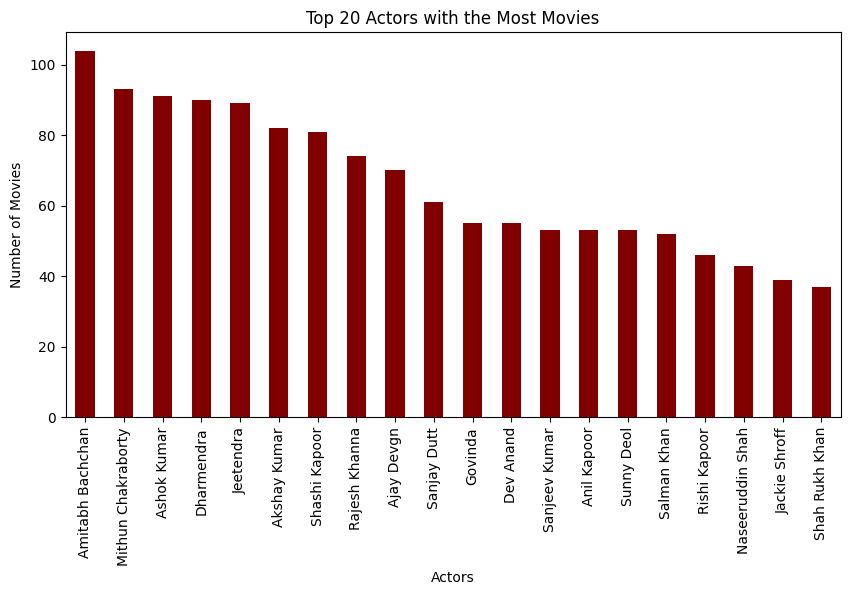

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 5))
actor_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Actors with the Most Movies')
plt.xticks(rotation=90)

In [ ]:
# Add count labels on top of the bars
for i, v in enumerate(actor_movie_counts.head(20)):
  plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

v. Movie Duration vs. Rating Scatter Plot

In [ ]:
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

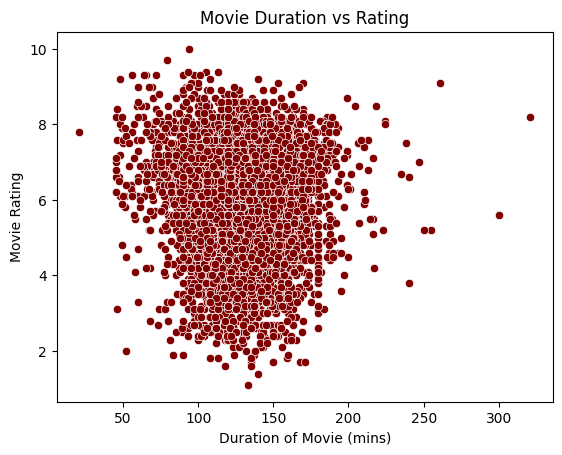

In [ ]:
#create a scatter plot with Duration and Rating relationship
sns.scatterplot(x=df['Duration'], y=df['Rating'],  color = 'maroon')
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()

Feature Engineering

In [ ]:
#dropping the columns from the dataframe since these are the least dependable observations for target variable 'Rating'
df.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
# show first five records of the dataframe
df.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8
3,2019,110,"Comedy, Romance",4.4,35
5,1997,147,"Comedy, Drama, Musical",4.7,827
6,2005,142,"Drama, Romance, War",7.4,1086
8,2012,82,"Horror, Mystery, Thriller",5.6,326


In [ ]:
#creating target variable and learning observations for the model
X = df[['Year','Duration','Votes']]
y = df['Rating']

In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

Machine Learning Modeling Techniques

i. Linear Regression Model

In [ ]:
# creating a liner regression model
lr = LinearRegression()
# training the data on linear regression model
lr.fit(X_train, y_train)
# predicting the test data on trained model
pred = lr.predict(X_test)
# evaluating linear regression model
r2_score(y_test,pred)

0.008207910636606974

ii. K-Nearest Neighbors (KNN) Regression Model

In [ ]:
# creating a range for number of neighbors parameter of the KNN model
kRange = range(1,40,1)
# creating an empty scores list
scores_list = []
# iterate every value in kRange list
for i in kRange:
  # create a K Nearest Neighbor model with i as number of neighbors
  regressor_knn = KNeighborsRegressor(n_neighbors = i)
  # fit training data to the KNN model
  regressor_knn.fit(X_train,y_train)
  # evaluate the model
  pred = regressor_knn.predict(X_test)
  # append the regression score for evaluation of the model to scores_list
  scores_list.append(r2_score(y_test,pred))

In [ ]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

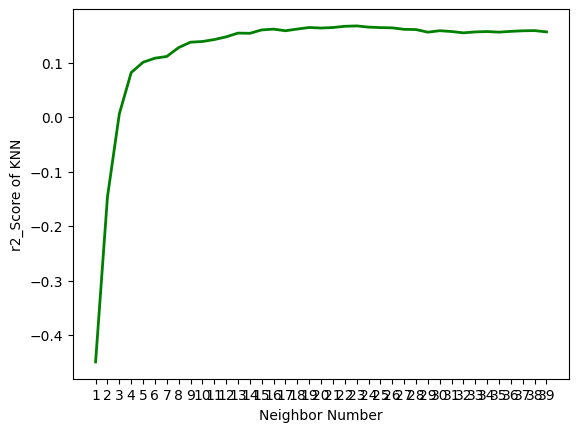

In [ ]:
# create a line graph for showing regression score (scores_list) for respective number of neighbors used in the KNN model
plt.plot(kRange, scores_list, linewidth=2, color='green')
# values for x-axis should be the number of neighbors stored in kRange
plt.xticks(kRange)
plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()

In [ ]:
# Creating a KNN model with best parameters i.e., number of neighbors = 23
regressor_knn = KNeighborsRegressor(n_neighbors = 23)
# fit training data to the KNN model
regressor_knn.fit(X_train,y_train)
# evaluate test data on the model
pred = regressor_knn.predict(X_test)
# show regression score
r2_score(y_test,pred)

0.16726995125083455

SGD Regression

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split # Import the train_test_split function

# Assuming you have your features in X and target variable in y
# Ensure that X and y have been defined and contain your data
X = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Replace with your features data
y = [10, 20, 30, 40]  # Replace with your target variable data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and testing sets

# Create an instance of the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=100, random_state=1)
# You can adjust themax_iter and random_state
# Fit the model to your training data
sgd_regressor.fit(X_train, y_train)
# Make predictions
pred = sgd_regressor.predict(X_test)
# Evaluate the model
r2 = r2_score(y_test, pred)
print("R-squared score:", r2)

R-squared score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
print(f'R-squared score (Random Forest): {r2_rf}')

R-squared score (Random Forest): nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=231)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=231)